<a href="https://colab.research.google.com/github/mayaIsraeli56/Step-To-Bhd1/blob/main/fdm_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FDM Project: 1D Heat Equation with a growth/decay factor**

<small> version: 25.12.24a</small>

* Main objective: design a simulator using
  **Finite Difference Method (FDM)**
  for solving a 1D heat equation numerically.

* **FDM** is a numerical method for solving differential
  equations and many other types of mathematical problems,
  which is explained in details at the course
  lecture notes and the official project booklet,
  with many examples that can help you
  with this project.

* Before starting to work on this project, please read the
  project booklet ("fdm.pdf"), and make sure you understand
  the examples of the 2D heat and wave equations there.
  You will find there links to other colab notebooks
  which should give you a good start for this project.

* You have to download a copy of this notebook to your
  private Google drive and work on your private copy.

* Please keep the same name: "fdm_project.ipynb".

* After completing work, you should upload it to
  your Moodle assignment box for the FDM project.

## Google Colab Notebook Quick Tutorial

* Students that are new to **Google Colab Notebook**
  are encouraged to invest 10 minutes in one of the following tutorials:

* Beginners **Google Colab (Jupyter notebook)**,
  YouTube courses:
  * [Complete Beginner's Tutorial to Google Colab](https://www.youtube.com/watch?v=JJYZ3OE_lGo)  
  * [Google Colab Tutorial for Beginners](https://www.youtube.com/watch?v=iMlMfrXJYSg)
  * [Official Google Colaboratory Tutorial](
    https://colab.research.google.com/drive/16pBJQePbqkz3QFV54L4NIkOn1kwpuRrj)

## Restart and Cleanup
* It is easy to get into troubles when you
  execute code. In such cases your notebook may be
  invalidated and you will have to restart.

* To restart your notebook, go to
  **Runtime** menu button and select the
  **Disconnect and delete runtime** item.

* It is also recommended to clear all outputs
  (**Edit** --> **Clear all outputs**).

* After restart, make sure to run all code cells
  **sequentially**.
  * Running code cells in the wrong order can
  result in a corrupt notebook and then you have to restart
  again.

## **Activation**
* The **FDM Project** is based on our
  Python package:
  [**fdmtools**](https://samyzaf.com/fdmtools.zip).

* Python coders can download it and inspect the code.
  But the usage is simple and explained in the many examples
  you should find in the course project booklet ("fdm.pdf")
  which you should find in the Moodle site.

* Execute the next code cell in order to install
  and load the
  [**fdmtools Package**](https://samyzaf.com/fdmtools.zip).

* At each stage you can restart your session
  from the **Runtime** menu ("Disconnect and delete runtime")
  if you get into trouble.

In [1]:
%pip install -q https://samyzaf.com/fdmtools.zip
from fdmtools.heatd1 import *

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
fdmtools version 5


## **Registration**
* Please enter your name, identity number, and email
  address in the following form.
* Use English letters only.
* After any change, press the **play** button to update.
* After registration, you will get two personal values
  for the parameters $\alpha$ and $\beta$ which will be used
  to define your assignment, and the pde problem
  you need to solve in this project.

In [2]:
# @title Student Form {"form-width":"50%"}
Name = 'Maya Israeli' # @param {type:"string"}
Id = '209956333' # @param {type:"string"}
Email = 'maya.isra56@gmail.com' # @param {type:"string"}

RunForm()

<IPython.core.display.Math object>


These parameters will be used in the equation you need to solve in this project.
They are also available as Python variables with names: alpha, beta
which you can access in your Python code at any later code cell.


* To be safe, run the next code cell to make sure that
  the variables **alpha** and **beta** are defined
  and have the designated values.

In [ ]:
print(alpha)
print(beta)

## **Description**
* Your mission is to use **FDM**
  for solving a special type of a 1D heat equation over
  a one dimensional metal rod (of finite length $L$).

* For simplicity we use constant boundary conditions
  of a Dirichlet type.

* The typical 1-dimensional heat problem deals with the
  propagation of heat along a finite metal rod,
  of homogeneous density and a constant diffusion rate $\alpha$.
  It is typically modeled by the standard **wave equation**:  

  $\large\qquad u_{t} = \alpha u_{xx}$  

  where $u(x,t)$ is the **temperature**
  at a point $x$ at time $t$,
  and $\alpha$ is a physical diffusion rate constant.

* Our project deals with the more general type of
  a 1D heat equation  

  $\large\qquad u_t = \alpha u_{xx} + \beta u$  

  where $\alpha$ is the usual **diffusion constant**
  and $\beta$ is a **growth/decay rate constant**.

* This equation models heat propagation along a metal rod,
  subject to boundary conditions.  

  <IMG
src="https://samyzaf.com/fdm/heatd1d.jpg?1"
width=540
align="center"
/>

## **Your Differential Equation Problem**

* The values of the coefficients $\alpha$ and $\beta$
  were assigned to you at the registration stage.

* These are unique values assigned for each student
  as a function of the **ID** number.

* Execute the next code cell to view again your pde problem.

In [3]:
display_my_pde()

<IPython.core.display.Math object>

* The physical time $T$ is determined
  by the simulation time which we will define later.

* The values of $\alpha$ and $\beta$ were allocated personally
  to each student (after the Registration stage).
  They are also available as **Python variables**
  with names: **alpha**, **beta**.
  So you can access them in your Python code in any later code cell.

## **Basic Parameters**
* Our metal rod is modeled as an interval $[0,L]$
  on the real $x$-axis.
* Please follow the following **FDM** parameters scheme
  for the coding task
  * **L** = Rod Length
  * **T** = Physical time duration (real time) of
     the heat phenomena
  * **alpha** = Physical diffusion rate constant
  * **beta** = Physical growth/decay rate constant
  * **seconds** = Simulation time
  * **N** = Grid division size for the interval $[0,L]$
  * **dx** = $x$ grid unit (L/N)
  * **dt** = Time grid discrete unit
  * **fps** = Frames Per Second (for video simulation)
  * **num_frames** = Total number of **time frames** in
     our simulation (same as **Nt**!)
  * **Nt** = Grid division size for the time interval $[0,T]$
    (same as **num_frames**)
  * **U** = 2D Numpy matrix which implements the FDM grid

## **Agenda**

* Our project is to use the **Finite Difference Method (FDM)**
  to solve the heat equation above on a metal rod
  of length **L=2**.

* We leave the parameter **T** open, so we
  we can experiment with different values.     

* Here is our suggested **FDM Parameter Plan** for this problem.

* You may experiment with other values in your solution
  process. For example, it is best to start with a small
  value of the **seconds** parameter until your code
  is stabilized (to save waiting time..).

In [5]:
L = 2.0                          # Length of rod
N = 100                          # Grid division size
dx = L/N                         # Step size of x grid unit
CFL = 0.5                        # Courant/Friedrich/Lewy condition
dt = CFL * dx**2/(2*alpha)       # Automatic choice for dt (See link below)
fps = 30                         # Frames per second (good for video simulation)
seconds = 15                     # Simulation time (good for video simulation)
T = seconds * fps * dt           # Physical time (the real time of the physical event)
num_frames = int(seconds*fps)    # Number of discrete time frames (same as Nt)
Nt = num_frames                  # Number of discrete time frames (Convenient shorthand)
#alpha                           # Heat diffusion rate (allocated earlier!)
#beta                            # Heat growth/decay rate (allocated earlier!)
gamma = alpha*dt/(dx**2)         # Convenient notation, but relevant to CFL stability
U = np.zeros((N+1, Nt+1))        # Our FDM grid (N+1)x(Nt+1) matrix (initialized to zeros)
                                 # Dividing a rod to N sub-intervals creates N+1 nodes!

print(f"dx = {dx}")
print(f"dt = {dt}")
print(f"gamma = {gamma}")

dx = 0.02
dt = 6.802721088435374e-05
gamma = 0.24999999999999997


* The **CFL** parameter refers to the
  [Courant/Friedrich/Lewy condition](https://en.wikipedia.org/wiki/Courant%E2%80%93Friedrichs%E2%80%93Lewy_condition)
  for selecting stable values for **dt**.

* The stability condition that guarantees convergence of our
  discrete approximation to a valid solution is  
  $\qquad
  \gamma = \frac{\alpha\Delta t}{\Delta x^2} \leq 0.5
  $  
  [Look at this GPT generated document for more details.](https://samyzaf.com/fdm/gpt_fdm_stability.pdf)

* By selecting $\Delta t = 0.5 \cdot \frac{\Delta x^2}{2\alpha}$,
  we ensure that the **CFL** stability condition is met, and that our
  computation will converge.
  
* However, it is recommended to experiment with other
  values for **CFL** for controlling the speed and duration
  of the simulation.

## **Boundary Conditions**

$\qquad
\left\{
    \begin{array}{ll}
    u(x,0) = x(2-x)\sin(3\pi x) + x,  &\quad 0\leq x \leq 2
    \\[0.5ex]
    u(0,t) = 0, &\quad 0\leq t\leq T
    \\[0.5ex]
    u(2,t) = 2, &\quad 0\leq t\leq T
    \end{array}
\right.
$  

* The specification of our boundary functions in
  Python is straightforward.

* Except for **f**, all functions are identically zero.

* Run the **Python code** for specifying the boundary conditions:

In [6]:
f  = lambda x: x * (L-x) * sin(3*pi*x) + x
f1 = lambda t: 0
f2 = lambda t: 2

## **Task 1: $\bf\LaTeX$ formulas**
* Solve your differential equation using the **FDM** method.

* You should obtain a recursive formula which
  computes the value of **U[i,k+1]** by previous
  terms such as **U[i-1,k]**, **U[i,k]**, **U[i+1,k]**.
  * It should not contain any derivatives of **U**!
  * Use the parameters suggested above numerically.
  * The symbols $\alpha$ and $\beta$ are not allowed.
  * It should be simplified.

* Make sure you rely on the boundary conditions!

* Edit the next text cell and write
  the three following formulas in $\LaTeX$ format
  1. The difference derivative $U_t$ which you used,
  2. The difference derivative $U_{xx}$ which you used,
  3. Your final recursive formula for computing the
     FDM grid $U$ on layer **k+1** from the previous layer **k**.  
     To be clear: derivatives of $U$ on the right side are not allowed!
* To edit a text cell: select the cell,
  and use the edit button on the top
  right menubar of the cell  

  <IMG
src="https://samyzaf.com/fdm/colab_cell_menubar.jpg"
width=400
align="center"
/>

* Before you can do that, you may need a quick tour of
  the $\LaTeX$ (LaTeX) system for writing math formulas.
  It shouldn't take you more than 5 minutes to get the idea.
  Please look at the short guide after the next cell.

### **Please complete the following formulas**
1. $U_t[i,k] = \frac{U[i,k+1]-U[i,k]}{Δt} $

2. $U_{xx}[i,k] = \frac{U[i + 1, k] − 2U[i, k] + U[i − 1, k]}{∆x^2} $

3. $U[i,k+1] = U[i,k] + γ \cdot (U[i + 1, k] − 2U[i, k] + U[i − 1, k])  + β ⋅Δt \cdot U[i,k] $

$ ----------------------------------------- $

$U[i,k+1] = U[i,k] + 1.47 \cdot (U[i + 1, k] − 2U[i, k] + U[i − 1, k]) \frac{ Δt}{∆x^2} +2.19\cdot U[i,k] ⋅Δt $

$\frac{U[i,k+1]-U[i,k]}{Δt} = 1.47\cdot\frac{U[i + 1, k] − 2U[i, k] + U[i − 1, k]}{∆x^2} +2.19 \cdot U[i,k]$



$ U[i,k+1] = U[i,k] + U_t[i,k] ⋅Δt $



## **5 Minutes $\bf\LaTeX$ Guide: write math in Google Colab Notebook in no time!**

* All we need to know is how to write a math fraction,
  exponent, subscript, and a few Greek letters!
  After going through the easy examples in this table, you
  have all you need for this task!  

  <IMG
src="https://samyzaf.com/fdm/latex_guide_1.jpg?3"
width=700
align="center"
/>  

<!--
|<font size="2"> LaTeX Command |&nbsp;&nbsp;|<font size="2"> How it is Displayed </font>|
| :---|:---:|:---|
| `$5U_x - 4U_{tt}$` || $5U_x - 4U_{tt}$ |
| `$\frac{3x^2 \Delta x}{4\delta}$` || $\frac{3x^2 \Delta x}{4\delta}$ |
| `$\alpha\Delta x + \beta\Delta t$` || $\alpha\Delta x+\beta\Delta t$|
| `$\gamma = \frac{\alpha\Delta t}{\Delta x^2}$` || $\gamma=\frac{\alpha\Delta t}{\Delta x^2}$ |
| `$8\delta < 0.25\epsilon + frac{3x^4}{a+1}$` || $8\delta < 0.25\epsilon + \frac{3x^4}{a+1}$ |  
-->


* A math formula starts with a `$` sign and ends with a `$` sign.

* This is good enough for our needs.

* For more information please visit the Google Official Guide:  
 [Equations and Formulas in Google Colab](https://colab.research.google.com/github/EPS-Libraries-Berkeley/volt/blob/main/LaTeX/Equations_and_Formulas.ipynb)

## **Task 2: Python Code**
* In this task you have to convert the recursive formula
  that you obtained in the previous task into
  a working Python code!

* Your main mission is to write a Python
  function **Solve(U)** which takes **U** as an argument
  and solves the equation.

* We started with an empty grid **U**, and your Python
  function **Solve(U)** should fill **U** with
  numerical values that approximate a solution to
  our differential equation.

* Write your **Solve(U)** function code in
  the following code cell (and execute it).

In [12]:
# # # Boundary conditions (specified directly)
# for k in range(0, Nt+1):
#     U[0,k] = 0     # u(0,t) = 0
#     U[N,k] = 2    # u(2,t)=2

# # Initial condition (specified directly)
# for i in range(0, N+1):
#     U[i,0] = i*dx*(2-i)*np.sin(3*np.pi*i)+i*dx         # u(x,0)=x(2−x)sin(3πx)+x

# Function to solve the heat equation using the finite difference method
def Solve(U):
  for k in range(0,Nt):
    for i in range(1,N):
      U[i, k + 1] = U[i, k] + gamma * (U[i + 1, k] - 2 * U[i, k] + U[i - 1, k]) + beta * dt * U[i, k]

# Solve the heat equation
Solve(U)
print("Diffusion grid U is solved")

# Plot the heat distribution for a given frame k
# def PlotHeatFrame(k):
#     x = np.linspace(0, L, N + 1)  # x-coordinates
#     plt.plot(x, U[:, k], label=f'Time = {k * dt:.2f} s')
#     plt.xlabel('Position (m)')
#     plt.ylabel('Temperature (°C)')
#     plt.title(f'Temperature Distribution at Time = {k * dt:.2f} s')
#     plt.legend()
#     plt.show()


# # Visualize selected frames using PlotHeatFrame(k)
# frames = 10 # Plot every 10th frame
# for k in range(0, Nt, int(Nt / frames)):
#     PlotHeatFrame(k)

Diffusion grid U is solved


* After writing your Solve(U) function, you need to run the
  simulation phase.

* The **RunSimulation()** function applies the boundary conditions
  on **U** and then executes your **Solve(U)** function.

* If passed successfully, then your FDM grid **U**
  is ready to rock. You may use it to approximate the solution
  **u(x,t)** of our problem at any point inside the domain.
  We also provide a **PlotHeatFrame** for plotting the solution
  at a given time t.

* Execute the next code cell to run the simulation.

In [13]:
RunSimulation()

Solve time: 0.068
Umin = -0.25
Umax = 2.25
Simulation is done!
You may now use the grid U for calculations and visualization.
You may use the PlotHeatFrame(k) command for drawing a selected frame k.


## **Task 3: compute the value of $u(0.5,0.01)$**
* In this task you have to write code for approximating
  the value of $u(0.5,0.01)$ using your FDM grid **U**.

* Write your code in the following code cell.

In [16]:
x = 0.5 ; t = 0.01
i = round(x/dx) ; k = round(t/dt)
print(f"i = {i} ; k = {k}")
print(f"U[{i},{k}] = ".ljust(20) + f"{U[i,k]}".ljust(25)  + "   (the FDM approximation)")


i = 25 ; k = 147
U[25,147] =         0.2903333232791563          (the FDM approximation)


## **Plotting**

* To help with debugging your code, we provide
  a plotting utility (**PlotHeatFrame**)
  for viewing heat frames.

* You can configure the following plotting parameters
  to inspect your solution.

In [17]:
# plotting parameters
text_x = 0.00                 # x coordinate for top text
text_y = 1.07                 # y coordinate for top text
math_x = 0.52                 # x coordinate for math text
figure_width = 5              # Figure width in inches
dpi = 120                     # Video resolution (dots per inch)
fontsize = 9                  # Text font size
linespacing = 1.5             # Spacing between text lines

math_text = [                 # LaTeX Math formula text for video
    r"$u_{t} = \alpha u_{xx} + \beta u$",
    r"$u(x,0,t) = x (2-x) \sin(3\pi x)$",
    r"$u(0,t) = 0$",
    r"$u(2,t) = 2$",
]

### **Plotting frames of your solution**
* You can plot a particular heat frame by
  using the **PlotHeatFrame** function.

* For example, to plot frame k=18 use the command:

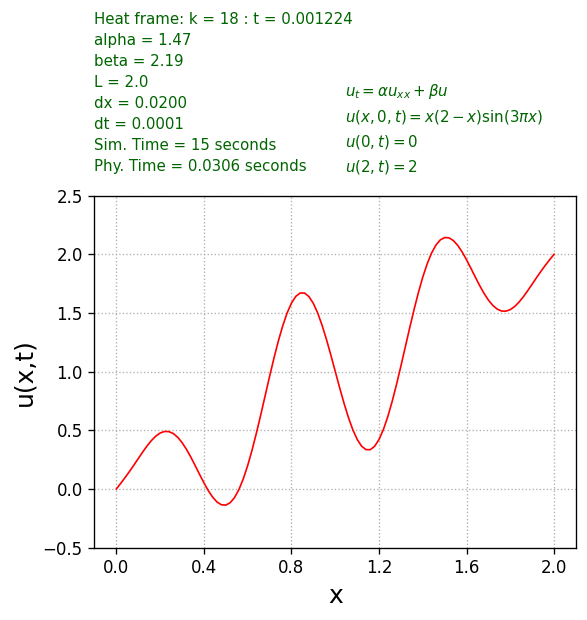

In [19]:
PlotHeatFrame(18)

## **Final Comments**
* Students interested in how the Numpy array is initialized
  with the boundary conditions can download the
  **[fdmtools package](https://samyzaf.com/fdmtools.zip)**
  and browse the Python code for all the details.

* Make sure you don't forget to fill your details at the
  form above. The most important detail is your ID number!

* After completing this project, you should save the notebook as
  an **ipynb** file on your local drive:
  **File-->Download-->Download .ipynb**.
  Then upload it to the
  assignment box of the Moodle project page.
  Make sure you keep the same name:
  **"fdm_project.ipynb"**.

* **GOOD LUCK!**